In [1]:
import numpy as np
import scipy.stats
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

from scipy.stats import binom

pallete = sns.color_palette("Paired")

In [2]:
pmf = binom.pmf(20, 100, 0.1)
print('Chance sucess of exact 20 with 100 tries and probability of 10%:', pmf)

Chance sucess of exact 20 with 100 tries and probability of 10%: 0.0011709869914049674


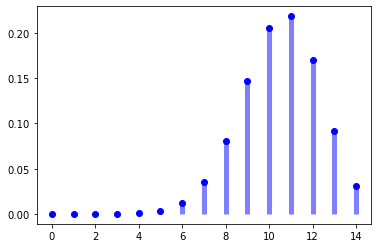

In [6]:
x = np.arange(0, 15, 1)

plt.plot(x, binom.pmf(x, n = 15,  p = 0.7), 'bo')
plt.vlines(x, 0, binom.pmf(x, n = 15,  p = 0.7), colors = 'b', lw = 5, alpha = 0.5)

CDF gives the probability of getting one value out a number of tries with a probability of sucess

In [7]:
cdf = binom.pmf(0,15, 0.7)+ binom.pmf(1,15, 0.7)+ binom.pmf(2,15, 0.7)+ binom.pmf(3,15, 0.7)+ binom.pmf(4,15, 0.7)+binom.pmf(5,15, 0.7)+binom.pmf(6,15, 0.7)
cdf

0.015242525769771021

CDF is the sum of the PMF's

In [8]:
binom.cdf(6,15, 0.1)

0.999689369462397

So the lower the number of sucessuful tries, the higher the number of tries and higher the rate of sucess gives
a lower cumulative chance of sucess.

In [9]:
k, n, p = 5, 15, 0.7
cdf = binom.cdf(k, n, p)
print('Chance of sucess of 7 out 15 with 70% is or less is::', cdf)

Chance of sucess of 7 out 15 with 70% is or less is:: 0.0036525210084360042


In [10]:
sum(np.random.binomial(15, 0.2, 1000) == 0)/1000.

0.03

A real world example. A company drills 9 wild-cat oil exploration wells, each with an estimated probability of success 
of 0.1. All nine wells fail. What is the probability of that happening?

Let’s do 20,000 trials of the model, and count the number that generate zero positive results.

In [11]:
sum(np.random.binomial(9, 0.1, 20000) == 0)/20000.

0.3901

In [12]:
# Random numbers from 1 to 10 with binomial distribution
n, p, k = 100, 0.5, 100
random_sample = np.random.binomial(n, p, k)
random_sample

array([43, 41, 50, 45, 42, 47, 40, 44, 51, 48, 50, 50, 54, 47, 50, 46, 53,
       54, 43, 50, 55, 53, 50, 46, 52, 53, 45, 51, 50, 57, 44, 57, 50, 50,
       53, 45, 48, 52, 43, 54, 52, 52, 47, 53, 54, 56, 53, 59, 51, 41, 46,
       61, 45, 41, 47, 48, 49, 51, 51, 51, 44, 55, 44, 45, 44, 49, 42, 55,
       40, 32, 42, 54, 53, 55, 41, 58, 48, 44, 50, 58, 50, 53, 49, 41, 49,
       43, 49, 50, 59, 48, 56, 52, 43, 50, 47, 56, 53, 58, 51, 51])

In [13]:
df = pd.DataFrame(random_sample, columns = ['flips_to_get'])
df.index.name = 'flip'
df

,flips_to_get
flip,
0,43
1,41
2,50
3,45
4,42
...,...
95,56
96,53
97,58


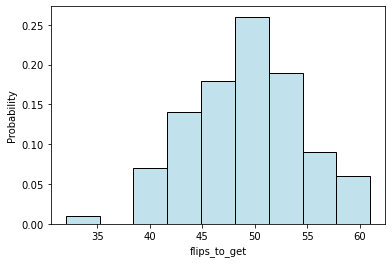

In [14]:
sns.histplot(data = df, x = 'flips_to_get', color = 'lightblue', stat = 'probability')
plt.show()

In [15]:
df_count = pd.DataFrame(df['flips_to_get'].value_counts())
df_count.rename(columns = {'flips_to_get': 'count'}, inplace = True)
prob = df_count['count']/np.sum((df_count['count']))
df_count['prob'] = prob
df_count.index.name = 'flip_to_get'
df_count

,count,prob
flip_to_get,,
50,13,0.13
53,9,0.09
51,8,0.08
44,6,0.06
43,5,0.05
52,5,0.05
45,5,0.05
49,5,0.05
47,5,0.05


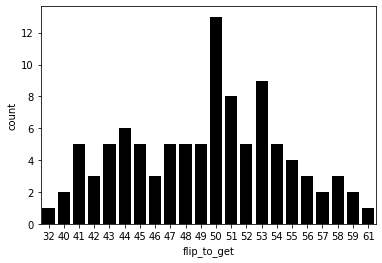

In [16]:
sns.barplot(data = df_count, x = df_count.index, y = 'count', color = 'black')
plt.show()

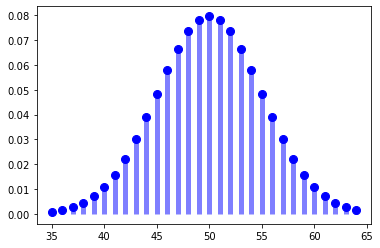

In [17]:
n, p = 100, .5

x = np.arange(binom.ppf(0.001, n, p),
              binom.ppf(0.999, n, p), 1)

#PMF Number of heads in 100 tries
plt.plot(x, binom.pmf(x, n, p), 'bo', ms = 8, label = 'binom pmf')
plt.vlines(x, 0, binom.pmf(x, n, p), colors = 'b', lw = 5, alpha = 0.5)
plt.show()

In [18]:
# Checking for cdf and pmf precision
prob = binom.cdf(x, n, p)
np.allclose(x, binom.ppf(prob, n, p))

True

In [19]:
# Random numbers with binomial distribution
n, p = 100, 0.5
x = binom.rvs(n, p, size = 100)

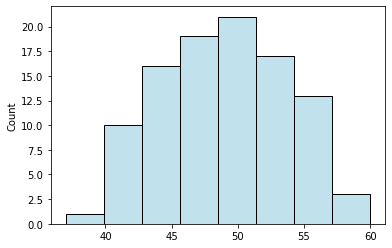

In [20]:
sns.histplot(x, color = 'lightblue', stat = 'count')
plt.show()

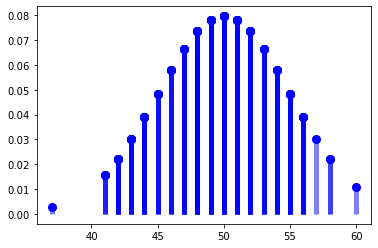

In [21]:
plt.plot(x, binom.pmf(x, n, p), 'bo', ms = 8, label = 'binom pmf')
plt.vlines(x, 0, binom.pmf(x, n, p), colors = 'b', lw = 5, alpha = 0.5)
plt.show()

In [22]:
# Chance sucess of 50 or less with 100 tries and probability of 50% 
k, n, p = 50, 100, 0.5
cdf = binom.cdf(k, n, p)
print('Chance of sucess of 50 or less is:', cdf)
print('Chance of sucess of 50 or more is:', 1 - cdf)

Chance of sucess of 50 or less is: 0.5397946186935895
Chance of sucess of 50 or more is: 0.46020538130641053


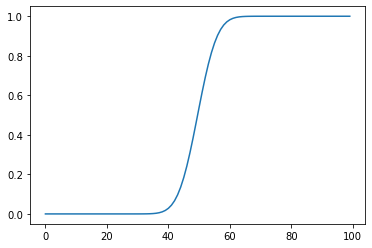

In [23]:
x = np.arange(0, 100, 1)
cdf = stats.binom.cdf
plt.plot(x, cdf(x, n, p))
plt.show()

In [24]:
# Chance sucess of 3 or less with 8 tries and probability of 40% 
k, n, p = 3, 8, 0.4
cdf = binom.cdf(k, n, p)
print('Chance of sucess of 3 or less is:', cdf)
print('Chance of sucess of 3 or more is:', 1 - cdf)

Chance of sucess of 3 or less is: 0.5940863999999999
Chance of sucess of 3 or more is: 0.4059136000000001


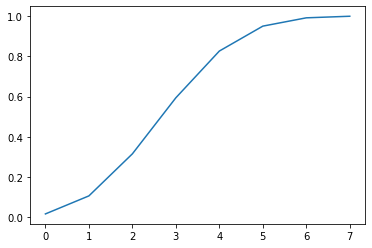

In [25]:
x = np.arange(0, 8, 1)
cdf = stats.binom.cdf
plt.plot(x, cdf(x, n, p))
plt.show()

In [26]:
# Random numbers with binomial distribution
n, p = 100, 0.5
x = binom.rvs(n, p, size = 100)
x

array([59, 47, 50, 53, 58, 45, 46, 45, 52, 43, 48, 40, 53, 56, 45, 49, 54,
       50, 50, 43, 45, 51, 50, 59, 46, 53, 51, 51, 53, 55, 43, 53, 59, 46,
       57, 54, 46, 50, 53, 50, 55, 54, 55, 48, 46, 47, 37, 44, 46, 42, 50,
       53, 44, 55, 53, 46, 43, 55, 47, 49, 48, 55, 43, 54, 44, 55, 41, 55,
       56, 60, 54, 51, 46, 59, 56, 55, 51, 42, 50, 49, 60, 56, 54, 53, 53,
       51, 53, 47, 57, 41, 60, 47, 46, 45, 60, 49, 46, 55, 52, 44])